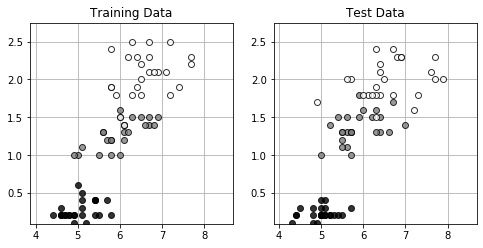

In [8]:
# データの作成とモジュールのインポート
import numpy as npy
import matplotlib.pyplot as plt
import time
npy.random.seed(1)
import keras.optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Activation
%matplotlib inline

outfile=npy.load('neural_data.npz')
X_train=outfile['X_train']
T_train=outfile['T_train']
X_test=outfile['X_test']
T_test=outfile['T_test']
X_range0=outfile['X_range0']
X_range1=outfile['X_range1']

# データの表示
def Show_data(x,t):
    wk,n=t.shape
    c=[[0,0,0],[.5,.5,.5],[1,1,1]]
    for i in range(n):
        plt.plot(x[t[:,i]==1,0],x[t[:,i]==1,1],linestyle='none',marker='o',markeredgecolor='black',color=c[i],alpha=0.8)
    plt.grid(True)

plt.figure(1,figsize=(8,3.7))
plt.subplot(1,2,1)
Show_data(X_train,T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1,2,2)
Show_data(X_test,T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')

plt.show()

In [14]:
# モデル作成
npy.random.seed(1) #1
model=Sequential() #2
model.add(Dense(2,input_dim=2,activation='sigmoid',kernel_initializer='uniform')) #3
model.add(Dense(3,activation='softmax',kernel_initializer='uniform')) #3
sgd=keras.optimizers.SGD(lr=0.25,momentum=0.0,decay=0.0,nesterov=False) #4
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy']) #4

# 学習
startTime=time.time()
history=model.fit(X_train, T_train, epochs=1000, batch_size=100,verbose=0,validation_data=(X_test,T_test)) #5

# モデル評価
score=model.evaluate(X_test, T_test, verbose=0) #6
print('cross entropy{0:.2f}, accuracy{1:.2f}'.format(score[0],score[1]))
calculation_time=time.time()-startTime
print("Calculation time:{0:.3f}sec".format(calculation_time))

cross entropy0.26, accuracy0.87
Calculation time:20.946sec


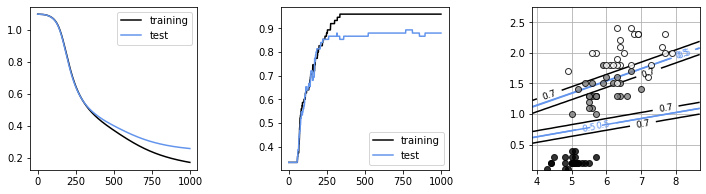

In [13]:
# 結果のグラフ表示
plt.figure(1,figsize=(12,3))
plt.subplots_adjust(wspace=0.5)

# 学習状況の表示
plt.subplot(1,3,1)
plt.plot(history.history['loss'],'black',label='training')
plt.plot(history.history['val_loss'],'cornflowerblue',label='test')
plt.legend()

# 精度の表示
plt.subplot(1,3,2)
plt.plot(history.history['accuracy'],'black',label='training')
plt.plot(history.history['val_accuracy'],'cornflowerblue',label='test')
plt.legend()

# 境界線の表示
plt.subplot(1,3,3)
Show_data(X_test, T_test)
xn=60
x0=npy.linspace(X_range0[0],X_range0[1],xn)
x1=npy.linspace(X_range1[0],X_range1[1],xn)
xx0,xx1=npy.meshgrid(x0,x1)
x=npy.c_[npy.reshape(xx0,xn*xn,order="F"),npy.reshape(xx1,xn*xn,order="F")]
y=model.predict(x)
K=3
for ic in range(K):
    f=y[:,ic]
    f=f.reshape(xn,xn)
    f=f.T
    cont=plt.contour(xx0,xx1,f,levels=[0.5,0.7],colors=['cornflowerblue','black'])
    cont.clabel(fmt='%.1f',fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()
